In [1]:
import numpy as np
#import modin.pandas as pd
import os
import time
import pandas as pd
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

In [3]:
time_resolution = '1week'
data_path = '../network_data'+str(time_resolution)+'/'

c_path = '../network_data'+time_resolution+'/commits/'
e_path = '../network_data'+time_resolution+'/emails/'
#c_path = './network_data/commits/'
mix_path = data_path+"mix/"

In [4]:
df_tech_edges= pd.read_csv("../result_csv/tech_edges"+str(time_resolution)+".csv") 
df_social_edges= pd.read_csv("../result_csv/social_edges"+str(time_resolution)+".csv")

In [5]:
df_tech_edges.fillna(0).iloc[1:]

,Blur,VXQuery,SkyWalking,Hama,Wookie,HAWQ,Mnemonic,Graffito,TVM,SINGA,...,Hudi,Groovy,OGNL,Warble,CommonsRDF,RCF,Weex,Directory,JuiCE,Beam
1,1285,776.0,4121.0,661.0,714.0,1756.0,267.0,558.0,6981.0,1173.0,...,165.0,121.0,792.0,0.0,0.0,0.0,0.0,2.0,18.0,0.0
2,300,127.0,482.0,124.0,160.0,151.0,46.0,93.0,882.0,90.0,...,6.0,0.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86,34.0,67.0,29.0,16.0,48.0,32.0,23.0,174.0,6.0,...,17.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21,7.0,10.0,16.0,5.0,9.0,5.0,11.0,103.0,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,12,1.0,0.0,5.0,1.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,9,0.0,0.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_tech_edges_ratio = pd.DataFrame()
for col in df_tech_edges.columns:
    this_proj_series = df_tech_edges[col]/pd.Series.sum(df_tech_edges[col])
    df_tech_edges_ratio[col] = this_proj_series
    
    

/tmp/ipykernel_20775/1489874888.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tech_edges_ratio[col] = this_proj_series


In [7]:
df_tech_edges_ratio.fillna(0).iloc[1:]

,Blur,VXQuery,SkyWalking,Hama,Wookie,HAWQ,Mnemonic,Graffito,TVM,SINGA,...,Hudi,Groovy,OGNL,Warble,CommonsRDF,RCF,Weex,Directory,JuiCE,Beam
1,0.748834,0.821164,0.880556,0.781324,0.796875,0.892730,0.762857,0.812227,0.857617,0.916406,...,0.873016,1.0,0.826722,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.174825,0.134392,0.102991,0.146572,0.178571,0.076767,0.131429,0.135371,0.108354,0.070312,...,0.031746,0.0,0.137787,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050117,0.035979,0.014316,0.034279,0.017857,0.024403,0.091429,0.033479,0.021376,0.004687,...,0.089947,0.0,0.035491,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.012238,0.007407,0.002137,0.018913,0.005580,0.004575,0.014286,0.016012,0.012654,0.007812,...,0.005291,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.006993,0.001058,0.000000,0.005910,0.001116,0.000508,0.000000,0.002911,0.000000,0.000781,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.005245,0.000000,0.000000,0.011820,0.000000,0.001017,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000583,0.000000,0.000000,0.001182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_social_edges.fillna(0)[1:]

,Rya,FtpServer,Blur,VXQuery,SkyWalking,NetBeans,Edgent,Hama,Wookie,S4,...,MyFaces,mod_ftp,cotton,geronimo,Kabuki,Pivot,Tika,tapestry,OGNL,RCF
1,552,146.0,280,120,282,7818,334,410,306,504,...,1784,20,0.0,350,8.0,122,30.0,58.0,728,0.0
2,96,30.0,54,14,12,676,88,54,72,98,...,168,10,0.0,32,0.0,20,6.0,0.0,202,0.0
3,30,0.0,8,6,16,186,26,32,18,24,...,42,0,0.0,14,0.0,4,0.0,0.0,60,0.0


In [9]:
df_social_edges_ratio = pd.DataFrame()
for col in df_social_edges.columns:
    this_proj_series = df_social_edges[col]/pd.Series.sum(df_social_edges[col])
    df_social_edges_ratio[col] = this_proj_series
    
    

/tmp/ipykernel_20775/3852141967.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_social_edges_ratio[col] = this_proj_series


In [10]:
df_social_edges_ratio.fillna(0).iloc[1:]

,Rya,FtpServer,Blur,VXQuery,SkyWalking,NetBeans,Edgent,Hama,Wookie,S4,...,MyFaces,mod_ftp,cotton,geronimo,Kabuki,Pivot,Tika,tapestry,OGNL,RCF
1,0.814159,0.829545,0.818713,0.857143,0.909677,0.900691,0.745536,0.826613,0.772727,0.805112,...,0.894684,0.666667,0.0,0.883838,1.0,0.835616,0.833333,1.0,0.735354,0.0
2,0.141593,0.170455,0.157895,0.100000,0.038710,0.077880,0.196429,0.108871,0.181818,0.156550,...,0.084253,0.333333,0.0,0.080808,0.0,0.136986,0.166667,0.0,0.204040,0.0
3,0.044248,0.000000,0.023392,0.042857,0.051613,0.021429,0.058036,0.064516,0.045455,0.038339,...,0.021063,0.000000,0.0,0.035354,0.0,0.027397,0.000000,0.0,0.060606,0.0


In [11]:
all_g = list()
for x in df_tech_edges.columns:
    if x in all_graduated:
        all_g.append(x)
    elif x.lower() in all_graduated:
        all_g.append(x)

all_r = list()
for x in df_tech_edges.columns:
    if x in all_retired:
        all_r.append(x)
    elif x.lower() in all_retired:
        all_r.append(x)

In [12]:
df_tech_edges_graduated = df_tech_edges_ratio.fillna(0).iloc[2:][all_g]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges_ratio))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
#all_retired.remove('Weex')
df_tech_edges_retired = df_tech_edges_ratio.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : tech Networks')

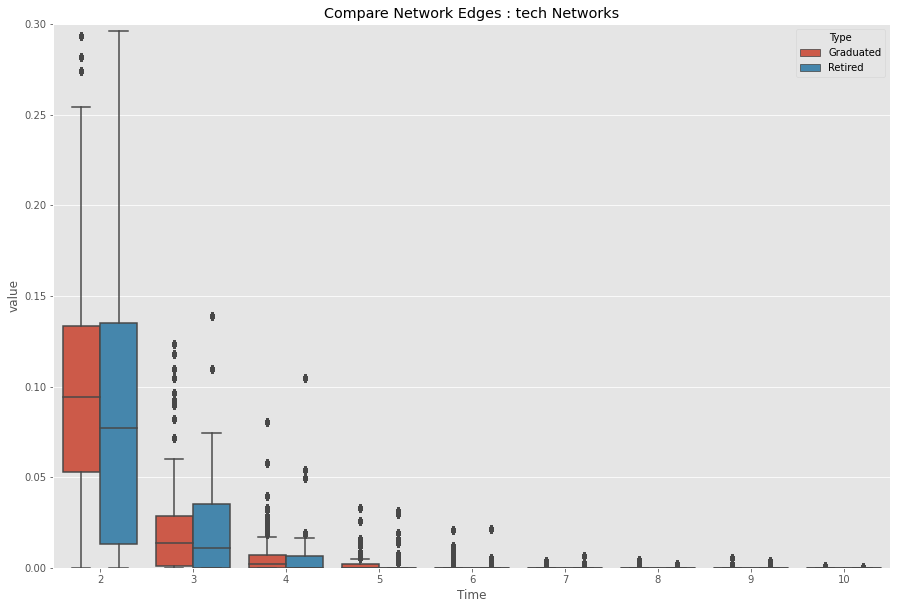

In [13]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 0.3)
plt.title("Compare Network Edges : tech Networks")

In [14]:
all_g = list()
for x in df_social_edges.columns:
    if x in all_graduated:
        all_g.append(x)
    elif x.lower() in all_graduated:
        all_g.append(x)

all_r = list()
for x in df_social_edges.columns:
    if x in all_retired:
        all_r.append(x)
    elif x.lower() in all_retired:
        all_r.append(x)

In [15]:
df_social_edges_graduated = df_social_edges_ratio.fillna(0).iloc[2:][all_g]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges_ratio))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
df_social_edges_retired = df_social_edges_ratio.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : Social Networks')

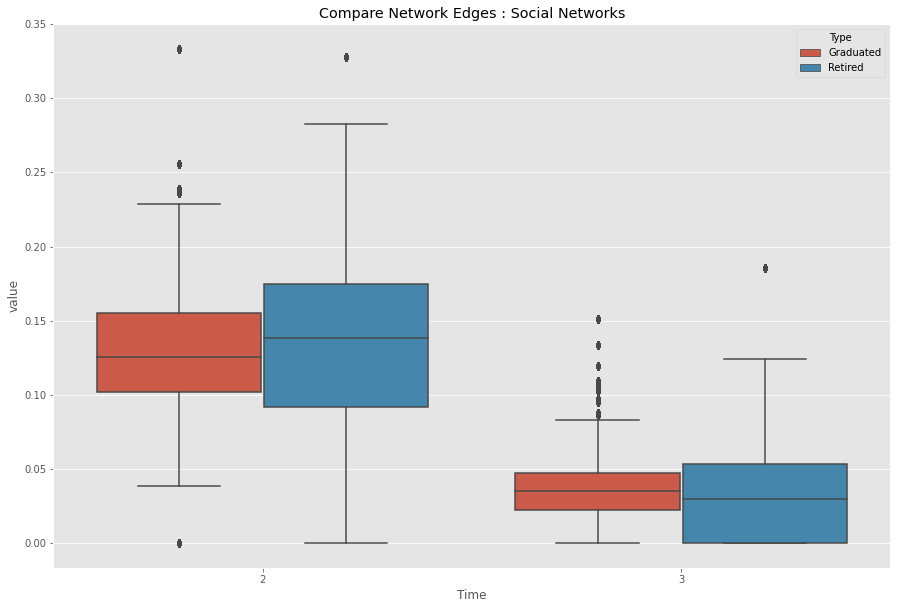

In [16]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
#plt.ylim(0, 350)
plt.title("Compare Network Edges : Social Networks")

In [17]:
time_resolution = '2week'
data_path = './network_data'+str(time_resolution)+'/'

c_path = './network_data'+time_resolution+'/commits/'
e_path = './network_data'+time_resolution+'/emails/'
#c_path = './network_data/commits/'
mix_path = data_path+"mix/"

In [18]:
df_tech_edges= pd.read_csv("./tech_edges"+str(time_resolution)+".csv") 
df_social_edges= pd.read_csv("./social_edges"+str(time_resolution)+".csv")

In [19]:
df_tech_edges.fillna(0).iloc[1:]

,Etch,Impala,Shindig,NetBeans,Zeppelin,Rya,FreeMarker,stdcxx,OpenWhisk,Wave,...,TripleSoup,Onami,Corinthia,Warble,JuiCE,Climate Model Diagnostic Analyzer,Kalumet,Directory,composer,Concerted
1,1841,7054,3334,75981,1339,4845,1129,1209,4729,3843,...,279.0,625,3080,79.0,0.0,1034,317,527.0,0.0,0.0
2,216,642,638,1211,203,207,1349,166,473,122,...,0.0,30,5118,0.0,0.0,31,12,0.0,0.0,0.0


In [20]:
df_tech_edges_ratio = pd.DataFrame()
for col in df_tech_edges.columns:
    this_proj_series = df_tech_edges[col]/pd.Series.sum(df_tech_edges[col])
    df_tech_edges_ratio[col] = this_proj_series
    
    

/tmp/ipykernel_20775/1489874888.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tech_edges_ratio[col] = this_proj_series


In [21]:
df_social_edges.fillna(0).iloc[2:]

,Myriad,Etch,SINGA,Impala,Shindig,Droids,NetBeans,Wave,Shiro,Zeppelin,...,RCF,NiFi,Traffic Server,Alois,Rave,Nutch,Onami,Tapestry,SocialSite,Kabuki
2,98,44.0,14.0,270,468,60.0,756,404.0,136,462,...,0.0,172.0,32.0,4.0,116,82.0,38.0,28.0,0.0,0.0
3,32,10.0,2.0,78,134,12.0,222,108.0,54,124,...,0.0,48.0,8.0,2.0,36,22.0,14.0,0.0,0.0,0.0
4,10,4.0,0.0,50,58,0.0,88,40.0,18,52,...,0.0,20.0,8.0,0.0,4,0.0,10.0,0.0,0.0,0.0
5,2,2.0,0.0,36,32,0.0,54,12.0,16,22,...,0.0,8.0,4.0,0.0,8,0.0,0.0,0.0,0.0,0.0
6,8,0.0,0.0,10,18,0.0,22,12.0,8,12,...,0.0,8.0,0.0,0.0,2,0.0,6.0,0.0,0.0,0.0
7,0,0.0,0.0,16,8,0.0,18,4.0,2,8,...,0.0,0.0,0.0,0.0,10,0.0,0.0,0.0,0.0,0.0
8,0,0.0,0.0,4,0,0.0,6,4.0,2,4,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
9,0,0.0,0.0,2,2,0.0,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
10,2,0.0,0.0,0,0,0.0,4,0.0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_social_edges_ratio = pd.DataFrame()
for col in df_social_edges.columns:
    this_proj_series = df_social_edges[col]/pd.Series.sum(df_social_edges[col])
    df_social_edges_ratio[col] = this_proj_series
    
    

/tmp/ipykernel_20775/3852141967.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_social_edges_ratio[col] = this_proj_series


In [23]:
all_g = list()
for x in df_tech_edges.columns:
    if x in all_graduated:
        all_g.append(x)
    elif x.lower() in all_graduated:
        all_g.append(x)

all_r = list()
for x in df_tech_edges.columns:
    if x in all_retired:
        all_r.append(x)
    elif x.lower() in all_retired:
        all_r.append(x)

In [24]:
df_tech_edges_graduated = df_tech_edges_ratio.fillna(0).iloc[2:][all_g]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges_ratio))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
#all_retired.remove('Weex') 
df_social_edges_retired = df_social_edges_ratio.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*2 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : tech Networks')

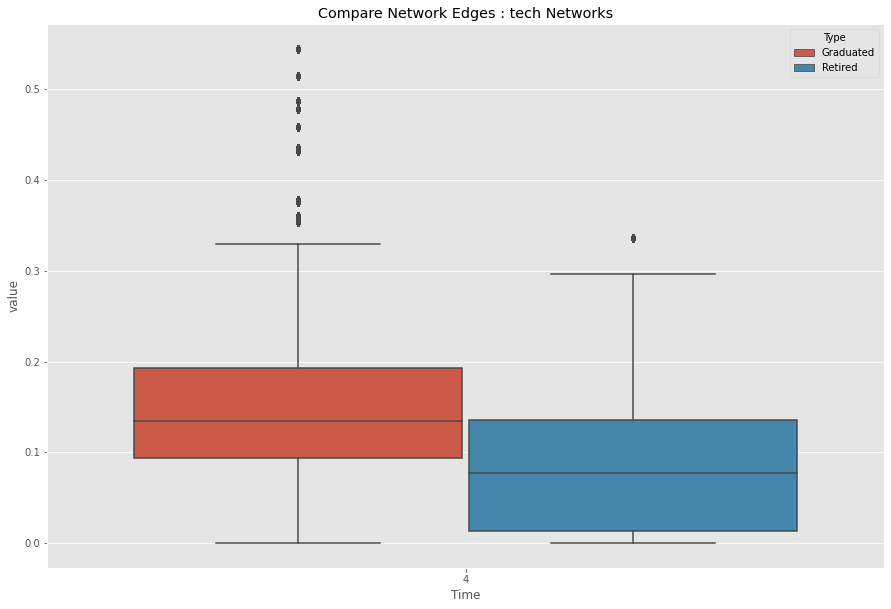

In [25]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
#plt.ylim(0, 300)
#plt.xlim(0, 25)
plt.title("Compare Network Edges : tech Networks")

In [26]:
all_g = list()
for x in all_graduated:
    if x in df_social_edges.columns:
        all_g.append(x) 
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 

In [27]:
df_social_edges_graduated = df_social_edges_ratio.fillna(0).iloc[2:][all_g]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges_ratio))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_social_edges_retired = df_social_edges_ratio.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*2 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : social Networks')

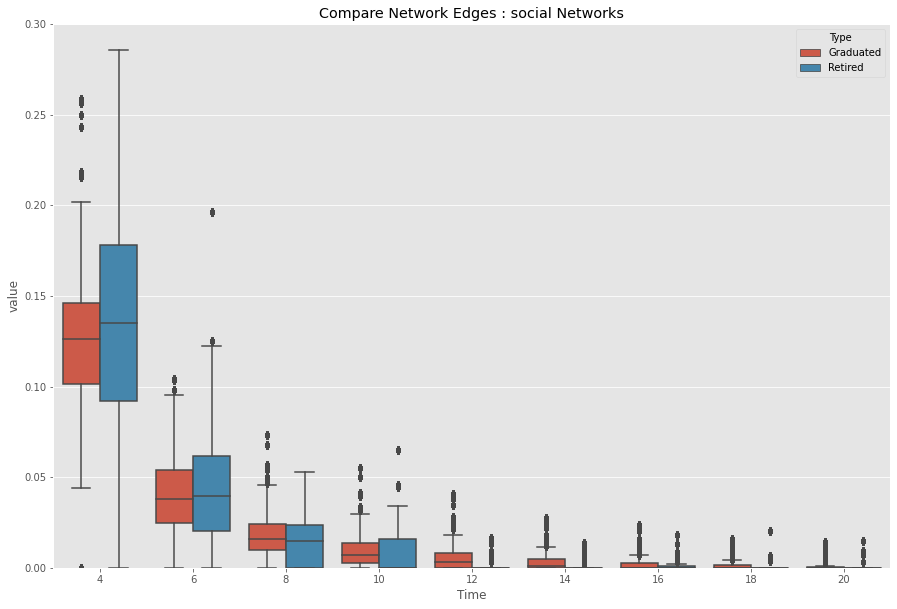

In [28]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 0.3)
#plt.xlim(0, 25)
plt.title("Compare Network Edges : social Networks")

In [29]:
time_resolution = '3week'
data_path = './network_data'+str(time_resolution)+'/'

c_path = './network_data'+time_resolution+'/commits/'
e_path = './network_data'+time_resolution+'/emails/'
#c_path = './network_data/commits/'
mix_path = data_path+"mix/"

df_tech_edges= pd.read_csv("./tech_edges"+str(time_resolution)+".csv") 
df_social_edges= pd.read_csv("./social_edges"+str(time_resolution)+".csv")

In [30]:
all_g = list()
for x in df_tech_edges.columns:
    if x in all_graduated:
        all_g.append(x)
    elif x.lower() in all_graduated:
        all_g.append(x)

all_r = list()
for x in df_tech_edges.columns:
    if x in all_retired:
        all_r.append(x)
    elif x.lower() in all_retired:
        all_r.append(x)

In [31]:
df_tech_edges_ratio = pd.DataFrame()
for col in df_tech_edges.columns:
    this_proj_series = df_tech_edges[col]/pd.Series.sum(df_tech_edges[col])
    df_tech_edges_ratio[col] = this_proj_series
    
    

/tmp/ipykernel_20775/1489874888.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tech_edges_ratio[col] = this_proj_series


In [32]:
df_social_edges_ratio = pd.DataFrame()
for col in df_social_edges.columns:
    this_proj_series = df_social_edges[col]/pd.Series.sum(df_social_edges[col])
    df_social_edges_ratio[col] = this_proj_series
    
    

/tmp/ipykernel_20775/3852141967.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_social_edges_ratio[col] = this_proj_series


In [33]:
df_tech_edges_graduated = df_tech_edges_ratio.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges_ratio))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
df_tech_edges_retired = df_tech_edges_ratio.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*3 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2, 3, 4, 5, 6, 7, 8]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : tech Networks')

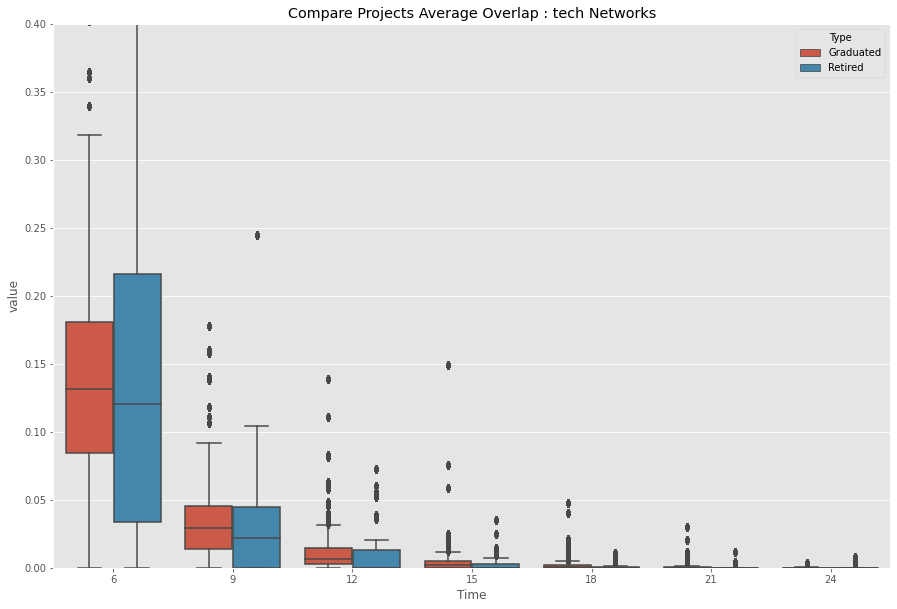

In [34]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 0.4)
#plt.xlim(0, 10)
plt.title("Compare Projects Average Overlap : tech Networks")

In [35]:
all_g = list()
for x in all_graduated:
    if x in df_social_edges.columns:
        all_g.append(x) 
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 

In [36]:
df_social_edges_graduated = df_social_edges_ratio.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
df_social_edges_retired = df_social_edges_ratio.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*3 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : social Networks')

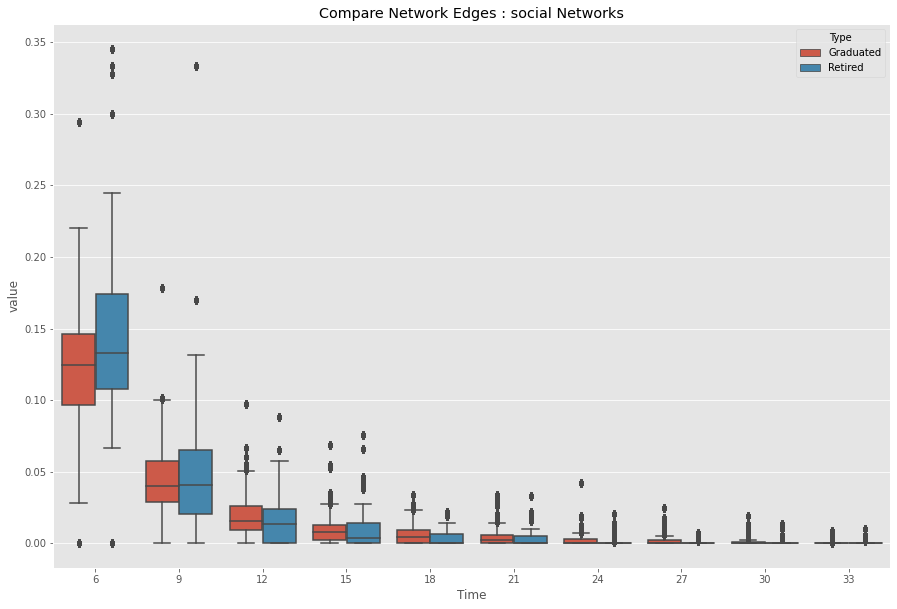

In [37]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
#plt.ylim(0, 100)
#plt.xlim(0, 10)
plt.title("Compare Network Edges : social Networks")

In [38]:
time_resolution = 1

#data_path = '/mnt/data0/proj_osgeo/data_ASF_trial/network_data'+str(time_resolution)+'/'

c_path = '../network_data'+str(time_resolution)+'/commits/'
e_path = '../network_data'+str(time_resolution)+'/emails/'
mix_path = '../network_data'+str(time_resolution)+'/mix/'
#c_path = './network_data/commits/'

df_tech_edges = pd.read_csv("../result_csv/tech_edges"+str(time_resolution)+".csv")
df_social_edges = pd.read_csv("../result_csv/social_edges"+str(time_resolution)+".csv")
df_mix_edges = pd.read_csv("../result_csv/mix_edges"+str(time_resolution)+".csv")


In [39]:
df_tech_edges.fillna(0).iloc[2:]

,Edgent,Hadoop Development Tools (HDT),Mnemonic,Juneau,ODF Toolkit,Zeta Components,Streams,Oozie,Roller,Nuvem,...,Hermes,Spark,Concerted,Nutch,Brooklyn,Kabuki,Traffic Server,Beam,Airflow,Directory
2,176,11.0,43,133,161.0,0.0,865,62,759,35,...,157,111,15.0,99,71.0,0.0,0.0,0.0,0.0,0.0
3,11,0.0,25,19,0.0,0.0,62,18,163,13,...,36,26,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_tech_edges_ratio = pd.DataFrame()
for col in df_tech_edges.columns:
    this_proj_series = df_tech_edges[col]/pd.Series.sum(df_tech_edges[col])
    df_tech_edges_ratio[col] = this_proj_series
    
    

/tmp/ipykernel_20775/1489874888.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tech_edges_ratio[col] = this_proj_series


In [41]:
df_social_edges.fillna(0).iloc[2:]

,Edgent,Hadoop Development Tools (HDT),Mnemonic,Juneau,ODF Toolkit,Taverna,Zeta Components,Streams,Oozie,Roller,...,Concerted,APISIX,Lens,Subversion,juddi,MyFaces,WebWork 2,MetaModel,Hermes,Kabuki
2,90,38.0,102.0,28,92,88,52.0,44.0,78.0,234,...,30.0,98,66.0,236.0,20.0,0.0,1412.0,22,2.0,0.0
3,30,14.0,28.0,8,20,42,20.0,16.0,22.0,76,...,10.0,34,26.0,40.0,0.0,0.0,164.0,4,2.0,0.0
4,20,6.0,16.0,8,6,24,0.0,18.0,2.0,20,...,0.0,38,16.0,0.0,0.0,0.0,38.0,4,0.0,0.0
5,2,0.0,0.0,2,6,10,0.0,4.0,6.0,38,...,2.0,16,6.0,0.0,0.0,0.0,0.0,0,0.0,0.0
6,10,0.0,0.0,0,8,16,0.0,6.0,6.0,24,...,0.0,8,4.0,0.0,0.0,0.0,0.0,8,0.0,0.0
7,2,0.0,0.0,0,4,4,0.0,2.0,0.0,4,...,0.0,2,2.0,0.0,0.0,0.0,0.0,0,0.0,0.0
8,0,0.0,0.0,2,2,4,0.0,0.0,2.0,4,...,0.0,2,8.0,0.0,0.0,0.0,0.0,2,0.0,0.0
9,0,0.0,0.0,4,0,0,0.0,0.0,0.0,2,...,0.0,2,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [42]:
df_social_edges_ratio = pd.DataFrame()
for col in df_social_edges.columns:
    this_proj_series = df_social_edges[col]/pd.Series.sum(df_social_edges[col])
    df_social_edges_ratio[col] = this_proj_series
    
    

/tmp/ipykernel_20775/3852141967.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_social_edges_ratio[col] = this_proj_series


In [43]:
all_g = list()
for x in df_social_edges.columns:
    if x in all_graduated:
        all_g.append(x)
    elif x.lower() in all_graduated:
        all_g.append(x)

all_r = list()
for x in df_social_edges.columns:
    if x in all_retired:
        all_r.append(x)
    elif x.lower() in all_retired:
        all_r.append(x)

In [44]:
df_tech_edges_graduated = df_tech_edges_ratio.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges_ratio))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_tech_edges.columns:
        all_r.append(x) 
df_tech_edges_retired = df_tech_edges_ratio.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*4 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2, 3]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : tech Networks')

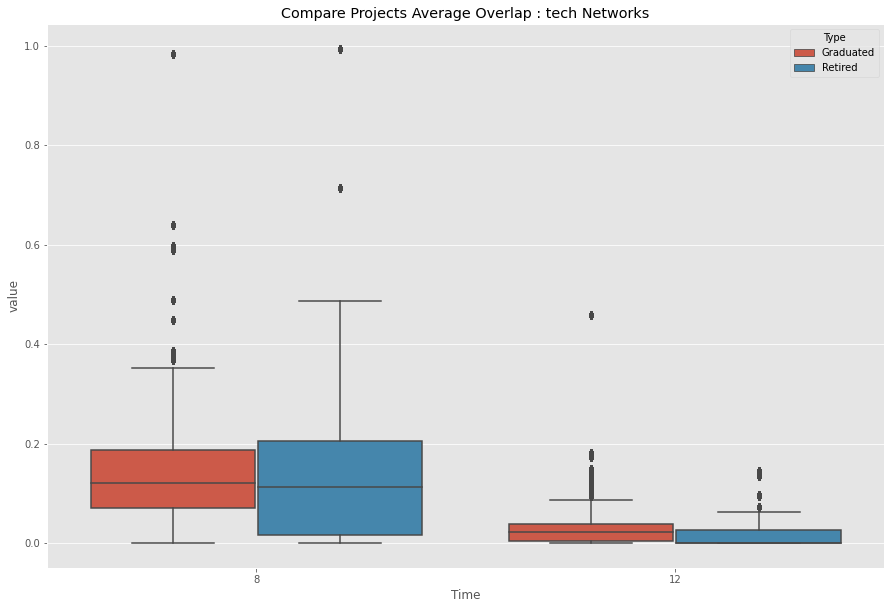

In [45]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
#plt.ylim(0, 800)
#plt.xlim(0, 10)
plt.title("Compare Projects Average Overlap : tech Networks")

In [46]:
df_social_edges_graduated = df_social_edges_ratio.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges_ratio))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 
df_social_edges_retired = df_social_edges_ratio.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*3 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3, 4, 5, 6, 7, 8, 9]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : social Networks')

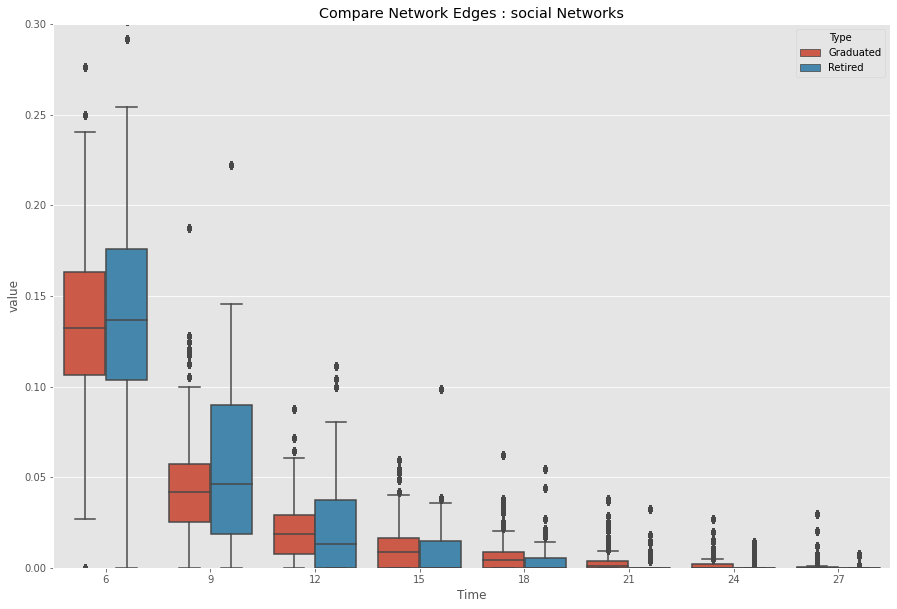

In [47]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 0.3)
#plt.xlim(0, 10)
plt.title("Compare Network Edges : social Networks")